In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

ModuleNotFoundError: No module named 'scipy'

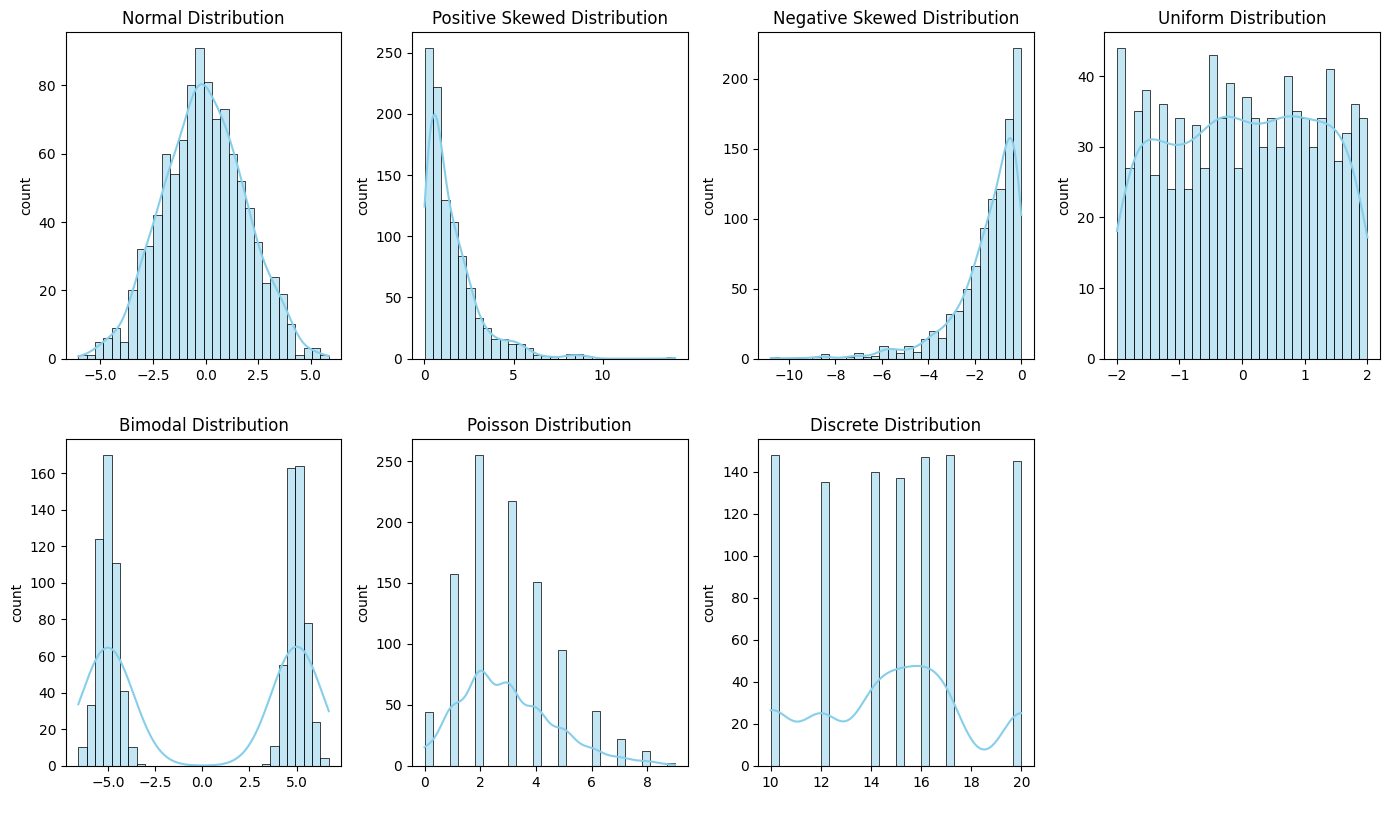

In [12]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (14, 16))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color="skyblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
np.random.seed(1516)

size = 1000

df = pd.DataFrame({
    "Normal": np.random.normal(loc=0, scale=2, size=size),
    "Positive Skewed":np.random.exponential(scale=1.5, size=size),
    "Negative Skewed":-np.random.exponential(scale=1.5, size=size),
    "Uniform": np.random.uniform(low=-2, high=2, size=size),
    "Bimodal": np.concatenate([np.random.normal(loc=-5, scale=0.5, size=size//2), np.random.normal(loc=5, scale=0.5, size=size//2)]),
    "Poisson": np.random.poisson(lam=3.0, size=size),
    "Discrete": np.random.choice([10, 12, 14, 15, 16, 17, 20,], size=size)
})
df = df.round(3)

summary= pd.DataFrame({
    "mean": df.mean(),
    "median": df.median(),
    "mode": df.mode().iloc[0],
    "Std": df.std(),
    "Variance": df.var(),
    "skewness": df.skew(),
    "kurtosis": df.kurtosis(),
    "Min": df.min(),
    "Range": df.max() - df.min(),

})

summary.style.background_gradient(cmap= "Blues").format(precision=2)

,mean,median,mode,Std,Variance,skewness,kurtosis,Min,Range
Normal,-0.08,-0.10,-3.60,1.94,3.77,0.01,-0.19,-6.04,11.88
Positive Skewed,1.51,1.02,0.00,1.55,2.40,2.31,8.33,0.00,14.07
Negative Skewed,-1.44,-1.02,-0.22,1.45,2.11,-2.10,6.12,-10.78,10.78
Uniform,0.02,0.03,-1.95,1.16,1.35,-0.04,-1.19,-2.00,4.00
Bimodal,0.01,0.07,-5.37,5.04,25.37,-0.00,-1.96,-6.57,13.27
Poisson,2.94,3.00,2.00,1.71,2.94,0.67,0.28,0.00,9.00
Discrete,14.88,15.00,10.00,3.07,9.41,0.02,-0.78,10.00,10.00


In [13]:
df2 = sns.load_dataset("penguins")
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [14]:
df2.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
#drop non-numeric columns
df2_num = df2.select_dtypes(include=["float64", "int64"]).dropna()
df2_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [17]:
df2_num.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [20]:
summary= pd.DataFrame({
    "mean": df2_num.mean(),
    "median": df2_num.median(),
    "mode": df2_num.mode().iloc[0],
    "Std": df2_num.std(),
    "Variance": df2_num.var(),
    "skewness": df2_num.skew(),
    "kurtosis": df2_num.kurtosis(),
    "Min": df2_num.min(),
    "Range": df2_num.max() - df2_num.min(),

})

summary.style.background_gradient(cmap= "Greens").format(precision=2)

,mean,median,mode,Std,Variance,skewness,kurtosis,Min,Range
bill_length_mm,43.92,44.45,41.10,5.46,29.81,0.05,-0.88,32.10,27.50
bill_depth_mm,17.15,17.30,17.00,1.97,3.90,-0.14,-0.91,13.10,8.40
flipper_length_mm,200.92,197.00,190.00,14.06,197.73,0.35,-0.98,172.00,59.00
body_mass_g,4201.75,4050.00,3800.00,801.95,643131.08,0.47,-0.72,2700.00,3600.00


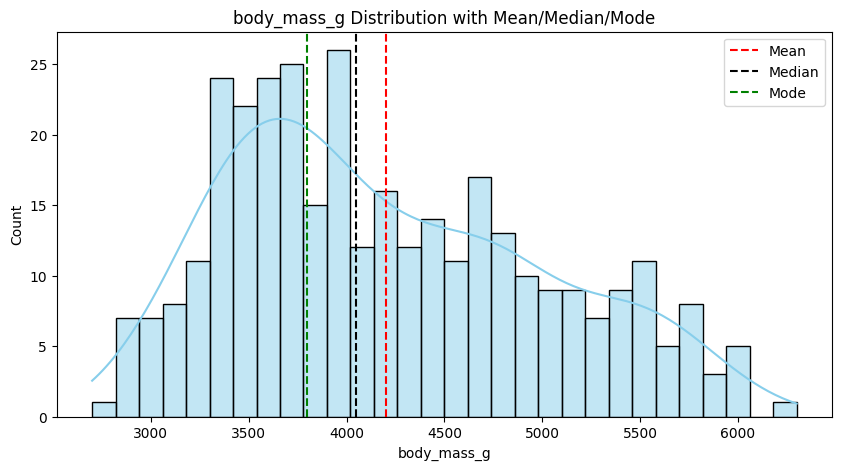

In [23]:
col = "body_mass_g"
fig, ax= plt.subplots(figsize = (10, 5))

sns.histplot(df2_num[col], kde= True, bins=30, color="skyblue")
plt.axvline(df2_num[col].mean(), color= "r", linestyle= "--", label="Mean")
plt.axvline(df2_num[col].median(), color= "k", linestyle= "--", label="Median")
plt.axvline(df2_num[col].mode()[0], color= "g", linestyle= "--", label="Mode")

plt.title(f"{col} Distribution with Mean/Median/Mode")
plt.legend()